Install SwitchTFI from GitHub. (Alternatively install from bioconda (recommended): ``conda install -c conda-forge -c bioconda switchtfi``)

In [1]:

!pip install git+https://github.com/bionetslab/SwitchTFI.git

  Cloning https://github.com/bionetslab/SwitchTFI.git to /tmp/pip-req-build-gr3rolbj
  Running command git clone --filter=blob:none --quiet https://github.com/bionetslab/SwitchTFI.git /tmp/pip-req-build-gr3rolbj
  Resolved https://github.com/bionetslab/SwitchTFI.git to commit a757fc5beff34b6c1bbce40ff013d919c4f72765
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Import packages and set random seed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

np.random.seed(42)

Download data and add progenitor-offspring annotations

In [3]:
erydata = sc.datasets.paul15()

# ### Subset adata to erythrocyte lineage
ery_labels = ['1Ery', '2Ery', '3Ery', '4Ery', '5Ery', '6Ery', '7MEP']
ery_bool = erydata.obs['paul15_clusters'].isin(ery_labels)
erydata = erydata[ery_bool, :].copy()

# ### Define and annotate progenitor and offspring clusters
label_to_progoff = {
    '7MEP': 'prog', '6Ery': 'prog', '5Ery': 'prog',
    '1Ery': 'off', '2Ery': 'off', '3Ery': 'off', '4Ery': 'off'
}
erydata.obs['prog_off'] = erydata.obs['paul15_clusters'].map(label_to_progoff)

print('# --- Data:\n', erydata)
print('# --- Progenitor-offspring count:\n', erydata.obs["prog_off"].value_counts())

# --- Data:
 AnnData object with n_obs × n_vars = 1262 × 3451
    obs: 'paul15_clusters', 'prog_off'
    uns: 'iroot'
# --- Progenitor-offspring count:
 prog_off
off     742
prog    520
Name: count, dtype: int64


Preprocess data

In [4]:
from switchtfi import process_data

erydata_proc = process_data(
    adata=erydata,
    qc_cells=True,
    qc_genes=True,
    magic_imputation=True,
    verbosity=1,
)

print('# --- Processed data:\n', erydata_proc)

Found no mitochondrial genes starting with "mt-" or "MT-".
# Number of cells before filtering: 1262
# Number of cells after filtering: 1130
# Number of filtered cells: 132
# Number of genes before filtering: 3451
# Number of genes after filtering: 3010
# Number of filtered genes with count less than 10: 441
Calculating MAGIC...
  Running MAGIC on 1130 cells and 3010 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.14 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.11 seconds.
    Calculating affinities...
    Calculated affinities in 2.70 seconds.
  Calculated graph and diffusion operator in 3.96 seconds.
  Calculating imputation...
  Calculated imputation in 0.25 seconds.
Calculated MAGIC in 4.23 seconds.
# --- Processed data:
 AnnData object with n_obs × n_vars = 1130 × 3010
    obs: 'paul15_clusters', 'prog_off', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_i

Visualize the processed data

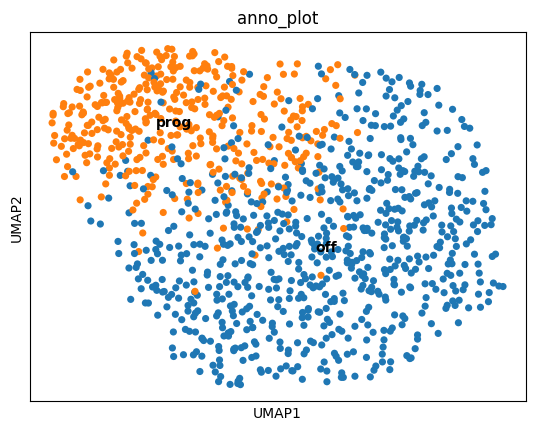

In [24]:
sc.pp.pca(erydata_proc, layer='X_log1p_norm')
sc.pp.neighbors(erydata_proc, use_rep='X_pca')
sc.tl.umap(erydata_proc)
erydata_proc.obs['anno_plot'] = erydata_proc.obs['prog_off'].astype('category')
sc.pl.umap(
    erydata_proc,
    color='anno_plot',
    legend_loc='on data'
)


Instantiate a previously inferred GRN.

In [6]:
from io import StringIO

grn_text = ''',TF,target
0,Arid3a,Abtb2
1,Arid3a,Ak3
2,Arid3a,Alas1
3,Arid3a,Anxa6
4,Arid3a,Arhgap21
5,Arid3a,Arhgap6
6,Arid3a,Arid1b
7,Arid3a,Bahcc1
8,Arid3a,Baiap2
9,Arid3a,Bcl2
10,Arid3a,Bcl2l11
11,Arid3a,Bex6
12,Arid3a,Camkk2
13,Arid3a,Ccnd2
14,Arid3a,Cdc42
15,Arid3a,Cep350
16,Arid3a,Cish
17,Arid3a,Csgalnact2
18,Arid3a,Dpp9
19,Arid3a,Fam64a
20,Arid3a,Fbxl20
21,Arid3a,Fchsd2
22,Arid3a,Fyn
23,Arid3a,Galnt6
24,Arid3a,Hlx
25,Arid3a,Hps3
26,Arid3a,Kif21b
27,Arid3a,Kpnb1
28,Arid3a,Lrrc1
29,Arid3a,Lrrfip1
30,Arid3a,Mcph1
31,Arid3a,Mllt6
32,Arid3a,Nxn
33,Arid3a,Pdxk
34,Arid3a,Plcl2
35,Arid3a,Prnd
36,Arid3a,Psmd5
37,Arid3a,Ptpre
38,Arid3a,Ramp1
39,Arid3a,Sars
40,Arid3a,Sbk1
41,Arid3a,Sec22c
42,Arid3a,Sec63
43,Arid3a,Sesn1
44,Arid3a,Skil
45,Arid3a,Snx10
46,Arid3a,Ssr2
47,Arid3a,Stxbp5
48,Arid3a,Tbc1d16
49,Arid3a,Tcf3
50,Arid3a,Tprgl
51,Arid3a,Ypel5
52,Arid3a,Zbtb46
53,Bcl3,Pcnx
54,Bcl3,Sik1
55,Bclaf1,Actr2
56,Bclaf1,Ahctf1
57,Bclaf1,Aplp2
58,Bclaf1,Arl4a
59,Bclaf1,Asxl1
60,Bclaf1,Atp13a3
61,Bclaf1,Atp2b1
62,Bclaf1,Baz1b
63,Bclaf1,Baz2b
64,Bclaf1,Brd4
65,Bclaf1,Canx
66,Bclaf1,Caprin1
67,Bclaf1,Casp3
68,Bclaf1,Cbx5
69,Bclaf1,Ccar1
70,Bclaf1,Cdc42
71,Bclaf1,Cdk13
72,Bclaf1,Cdyl
73,Bclaf1,Chd1
74,Bclaf1,Chd4
75,Bclaf1,Cltc
76,Bclaf1,Cpsf2
77,Bclaf1,Csde1
78,Bclaf1,Dap3
79,Bclaf1,Dck
80,Bclaf1,Dek
81,Bclaf1,Dnajc10
82,Bclaf1,Eif3a
83,Bclaf1,Eif4g2
84,Bclaf1,Elf1
85,Bclaf1,Elmo1
86,Bclaf1,Eps15
87,Bclaf1,Ezh2
88,Bclaf1,Fmr1
89,Bclaf1,Foxp1
90,Bclaf1,Fyn
91,Bclaf1,Galnt1
92,Bclaf1,Gng12
93,Bclaf1,Hipk1
94,Bclaf1,Hnrnpc
95,Bclaf1,Hprt
96,Bclaf1,Hspa4l
97,Bclaf1,Huwe1
98,Bclaf1,Igf1r
99,Bclaf1,Ikzf1
100,Bclaf1,Ipo5
101,Bclaf1,Itgb1
102,Bclaf1,Jak1
103,Bclaf1,Kdm5b
104,Bclaf1,Larp1b
105,Bclaf1,Lrrc58
106,Bclaf1,Man1a
107,Bclaf1,Map3k3
108,Bclaf1,Mbnl1
109,Bclaf1,Me2
110,Bclaf1,Mier1
111,Bclaf1,Mpp6
112,Bclaf1,Mtdh
113,Bclaf1,Mtfr1
114,Bclaf1,Naa50
115,Bclaf1,Nrip1
116,Bclaf1,Nucks1
117,Bclaf1,Oxr1
118,Bclaf1,Pcbp2
119,Bclaf1,Picalm
120,Bclaf1,Pkn2
121,Bclaf1,Ppp1r12a
122,Bclaf1,Prkaa1
123,Bclaf1,Prkar2b
124,Bclaf1,Rad21
125,Bclaf1,Rad23b
126,Bclaf1,Ranbp2
127,Bclaf1,Rbm27
128,Bclaf1,Rdx
129,Bclaf1,Rnf144a
130,Bclaf1,Scaf11
131,Bclaf1,Sec31a
132,Bclaf1,Slc16a1
133,Bclaf1,Slc22a23
134,Bclaf1,Slc38a2
135,Bclaf1,Spcs3
136,Bclaf1,Srcap
137,Bclaf1,Srrm2
138,Bclaf1,Ssb
139,Bclaf1,Tax1bp1
140,Bclaf1,Tbl1x
141,Bclaf1,Tbl1xr1
142,Bclaf1,Tcf12
143,Bclaf1,Tet2
144,Bclaf1,Tfrc
145,Bclaf1,Thrap3
146,Bclaf1,Tmpo
147,Bclaf1,Tnrc6b
148,Bclaf1,Top2b
149,Bclaf1,Trip12
150,Bclaf1,Uap1
151,Bclaf1,Usp1
152,Bclaf1,Usp24
153,Bclaf1,Usp25
154,Bclaf1,Usp32
155,Bclaf1,Usp34
156,Bclaf1,Usp6nl
157,Bclaf1,Usp9x
158,Bclaf1,Utrn
159,Bclaf1,Vcl
160,Bclaf1,Xk
161,Bclaf1,Ywhae
162,Bclaf1,Ywhaz
163,Bclaf1,Zcchc11
164,Bclaf1,Zcchc6
165,Bclaf1,Zfp217
166,Bclaf1,Zfp644
167,Cebpa,Ada
168,Cebpa,Aff3
169,Cebpa,Atp11a
170,Cebpa,Bcl11a
171,Cebpa,Clasp1
172,Cebpa,Larp1b
173,Cebpa,Myc
174,Cebpa,Nin
175,Cebpa,Nucks1
176,Cebpa,Ppp1r12a
177,Cebpa,Ptprs
178,Cebpa,Ranbp2
179,Cebpa,Rara
180,Cebpa,Usp25
181,Cebpe,2900026A02Rik
182,Cebpe,5033406O09Rik
183,Cebpe,App
184,Cebpe,Arhgef25
185,Cebpe,B330016D10Rik
186,Cebpe,Bcl3
187,Cebpe,Caprin2
188,Cebpe,Cars
189,Cebpe,Clic4
190,Cebpe,Ctdspl
191,Cebpe,Dok2
192,Cebpe,Elovl5
193,Cebpe,Fam174b
194,Cebpe,Fgfrl1
195,Cebpe,Isg15
196,Cebpe,Klhl36
197,Cebpe,Lmnb2
198,Cebpe,N4bp2l1
199,Cebpe,Panx1
200,Cebpe,Per3
201,Cebpe,Prpf3
202,Cebpe,Ptch1
203,Cebpe,Slbp
204,Cebpe,Tgm2
205,Cebpe,Tmem9
206,Cebpe,Tnfrsf1b
207,Cebpe,Traf4
208,Cebpe,Xrcc5
209,Cebpe,Zdhhc8
210,Cebpe,Zfhx2
211,Chd1,Adamts3
212,Chd1,Adk
213,Chd1,Aff4
214,Chd1,Anp32b
215,Chd1,Aplp2
216,Chd1,Asxl1
217,Chd1,Atp2b1
218,Chd1,B4galt6
219,Chd1,Baz1a
220,Chd1,Baz1b
221,Chd1,Bclaf1
222,Chd1,Birc6
223,Chd1,Brd4
224,Chd1,Canx
225,Chd1,Caprin1
226,Chd1,Casp3
227,Chd1,Ccar1
228,Chd1,Cdyl
229,Chd1,Chd6
230,Chd1,Cltc
231,Chd1,Cnot1
232,Chd1,Cpsf2
233,Chd1,Cux1
234,Chd1,Dach1
235,Chd1,Dap3
236,Chd1,Ddx6
237,Chd1,Dennd4a
238,Chd1,Dmxl1
239,Chd1,Dnajc10
240,Chd1,Dock7
241,Chd1,Eif3a
242,Chd1,Eif4g2
243,Chd1,Elavl1
244,Chd1,Eps15
245,Chd1,Ezh2
246,Chd1,Fnbp1l
247,Chd1,Fndc3a
248,Chd1,G3bp2
249,Chd1,Galnt1
250,Chd1,Gspt1
251,Chd1,Hdlbp
252,Chd1,Hectd1
253,Chd1,Herc1
254,Chd1,Hipk1
255,Chd1,Hp1bp3
256,Chd1,Hspa5
257,Chd1,Hspa8
258,Chd1,Ikzf1
259,Chd1,Itgb1
260,Chd1,Kdm5b
261,Chd1,Ktn1
262,Chd1,Luc7l2
263,Chd1,Lyst
264,Chd1,Me2
265,Chd1,Myh10
266,Chd1,N4bp2
267,Chd1,Nckap1
268,Chd1,Nfia
269,Chd1,Nucks1
270,Chd1,Osbpl8
271,Chd1,Oxr1
272,Chd1,Pcyt1a
273,Chd1,Pdcd4
274,Chd1,Picalm
275,Chd1,Pkn2
276,Chd1,Psip1
277,Chd1,Rabgap1l
278,Chd1,Rad21
279,Chd1,Rad23b
280,Chd1,Rapgef6
281,Chd1,Rbm25
282,Chd1,Rbm33
283,Chd1,Rdx
284,Chd1,Rrbp1
285,Chd1,Scaf11
286,Chd1,Sfmbt1
287,Chd1,Slc38a2
288,Chd1,Slmap
289,Chd1,Smad1
290,Chd1,Spata6
291,Chd1,Specc1l
292,Chd1,Srrm2
293,Chd1,Tbl1x
294,Chd1,Tet2
295,Chd1,Tfrc
296,Chd1,Tlk1
297,Chd1,Tmpo
298,Chd1,Ttc3
299,Chd1,Ublcp1
300,Chd1,Ugcg
301,Chd1,Usp1
302,Chd1,Usp24
303,Chd1,Usp25
304,Chd1,Usp34
305,Chd1,Wipf1
306,Chd1,Wrn
307,Chd1,Zfp644
308,Chd1,Zfp800
309,Cux1,Aff3
310,Cux1,Bahcc1
311,Cux1,Cbfa2t3
312,Cux1,Clic1
313,Cux1,Dab2ip
314,Cux1,Dok2
315,Cux1,Edem1
316,Cux1,Ehmt2
317,Cux1,Galnt6
318,Cux1,Hsd17b11
319,Cux1,Itgb1
320,Cux1,Itpr1
321,Cux1,Kctd1
322,Cux1,Kit
323,Cux1,Malat1
324,Cux1,Mdga1
325,Cux1,Mkl1
326,Cux1,Myb
327,Cux1,Nrgn
328,Cux1,Ptpre
329,Cux1,Ptprs
330,Cux1,Rab27b
331,Cux1,Ramp1
332,Cux1,S100a10
333,Cux1,Sord
334,Cux1,Ssh3
335,Cux1,Tspan5
336,Cux1,Vegfa
337,Cux1,Zswim4
338,Dido1,Abi2
339,Dido1,Add3
340,Dido1,Akap13
341,Dido1,Ankrd11
342,Dido1,Aplp2
343,Dido1,App
344,Dido1,Arhgap21
345,Dido1,Atp13a3
346,Dido1,Baz1a
347,Dido1,Brd4
348,Dido1,C1galt1
349,Dido1,Camk1d
350,Dido1,Canx
351,Dido1,Casp3
352,Dido1,Ccnd2
353,Dido1,Ccng2
354,Dido1,Cep350
355,Dido1,Chd4
356,Dido1,Chd6
357,Dido1,Csnk1a1
358,Dido1,Ctcf
359,Dido1,Cux1
360,Dido1,Dach1
361,Dido1,Eif3a
362,Dido1,Eif4g2
363,Dido1,Erc1
364,Dido1,Fmr1
365,Dido1,Hdlbp
366,Dido1,Herc1
367,Dido1,Hspa2
368,Dido1,Igf1r
369,Dido1,Kif1b
370,Dido1,Lyst
371,Dido1,Map3k3
372,Dido1,Myh10
373,Dido1,Naa50
374,Dido1,Nckap1
375,Dido1,Ncor1
376,Dido1,Nr3c1
377,Dido1,Nrip1
378,Dido1,Oxr1
379,Dido1,P2ry1
380,Dido1,Pcbp2
381,Dido1,Pcf11
382,Dido1,Pdcd4
383,Dido1,Pde5a
384,Dido1,Picalm
385,Dido1,Pip5k1b
386,Dido1,Pkn2
387,Dido1,Ptpn13
388,Dido1,Rabgap1l
389,Dido1,Rad21
390,Dido1,Ralgps2
391,Dido1,Ranbp2
392,Dido1,Rdx
393,Dido1,Sbno1
394,Dido1,Sipa1l1
395,Dido1,Slc16a1
396,Dido1,Smad1
397,Dido1,Spata6
398,Dido1,Srrm2
399,Dido1,Tax1bp1
400,Dido1,Tcf12
401,Dido1,Tlk1
402,Dido1,Tmpo
403,Dido1,Trip12
404,Dido1,Ttc3
405,Dido1,Usp24
406,Dido1,Ywhae
407,Dido1,Zcchc6
408,Dido1,Zfp644
409,Dido1,Zfp800
410,Dido1,Zmynd11
411,E2f2,Actr2
412,E2f2,Apip
413,E2f2,Asf1b
414,E2f2,Atp1b3
415,E2f2,Aurkb
416,E2f2,B4galnt1
417,E2f2,Bdh1
418,E2f2,Caprin2
419,E2f2,Cd82
420,E2f2,Cdc6
421,E2f2,Chd6
422,E2f2,Clcn3
423,E2f2,Clspn
424,E2f2,Cmtm3
425,E2f2,Cnnm2
426,E2f2,Ctnnb1
427,E2f2,Dck
428,E2f2,Dek
429,E2f2,Dennd1b
430,E2f2,E2f8
431,E2f2,Fam134b
432,E2f2,Fam53b
433,E2f2,Fbxo5
434,E2f2,Fyn
435,E2f2,Gpatch8
436,E2f2,Hells
437,E2f2,Hist1h2an
438,E2f2,Hnrnpd
439,E2f2,Hspa14
440,E2f2,Kif18b
441,E2f2,Klf3
442,E2f2,Map3k5
443,E2f2,Mcm10
444,E2f2,Mcm3
445,E2f2,Mcm4
446,E2f2,Mcm5
447,E2f2,Mcm6
448,E2f2,Mcm7
449,E2f2,Msh6
450,E2f2,Mtfr1
451,E2f2,Naip1
452,E2f2,Ndufb8
453,E2f2,Pcna
454,E2f2,Pfkm
455,E2f2,Phf19
456,E2f2,Picalm
457,E2f2,Pip5k1b
458,E2f2,Pkig
459,E2f2,Pola2
460,E2f2,Prkaa1
461,E2f2,Psen2
462,E2f2,Psip1
463,E2f2,Ptpn13
464,E2f2,Rasa2
465,E2f2,Rfc4
466,E2f2,Rgs12
467,E2f2,Rsbn1
468,E2f2,Sec14l2
469,E2f2,Svip
470,E2f2,Tapt1
471,E2f2,Tcf19
472,E2f2,Tet2
473,E2f2,Tfrc
474,E2f2,Thoc7
475,E2f2,Tm7sf3
476,E2f2,Tmem59
477,E2f2,Uhrf1
478,E2f2,Usp1
479,E2f2,Vangl1
480,E2f2,Vill
481,E2f2,Wls
482,E2f2,Zfhx3
483,E2f2,Zfp800
484,E2f8,2810474O19Rik
485,E2f8,Abi2
486,E2f8,Actr2
487,E2f8,Adamts3
488,E2f8,Afap1
489,E2f8,Aff4
490,E2f8,Aplp2
491,E2f8,Atic
492,E2f8,Atp13a3
493,E2f8,Baz1b
494,E2f8,Brd1
495,E2f8,Brd3
496,E2f8,Caprin1
497,E2f8,Cbfb
498,E2f8,Chd4
499,E2f8,Chd6
500,E2f8,Chd7
501,E2f8,Clic4
502,E2f8,Cpsf2
503,E2f8,Ctnnb1
504,E2f8,Daam1
505,E2f8,Dab2ip
506,E2f8,Dtx4
507,E2f8,Dusp16
508,E2f8,Eepd1
509,E2f8,Eif4b
510,E2f8,Eif4g1
511,E2f8,Elovl5
512,E2f8,Fbxo5
513,E2f8,Fhdc1
514,E2f8,Fkbp5
515,E2f8,Galnt1
516,E2f8,Gclm
517,E2f8,Gng2
518,E2f8,Gspt1
519,E2f8,Hdlbp
520,E2f8,Hmgb3
521,E2f8,Hp1bp3
522,E2f8,Ikzf2
523,E2f8,Jak1
524,E2f8,Kctd20
525,E2f8,Kif1b
526,E2f8,Ktn1
527,E2f8,Lmnb1
528,E2f8,Lrrc58
529,E2f8,Lsm14a
530,E2f8,Lyst
531,E2f8,Map3k5
532,E2f8,Map4
533,E2f8,Mbnl1
534,E2f8,Mcm3
535,E2f8,Med7
536,E2f8,Morf4l2
537,E2f8,N4bp2
538,E2f8,N4bp2l1
539,E2f8,Naa50
540,E2f8,Nap1l4
541,E2f8,Oat
542,E2f8,Pcf11
543,E2f8,Pcm1
544,E2f8,Pcna
545,E2f8,Pdha1
546,E2f8,Ppfibp1
547,E2f8,Psip1
548,E2f8,Ptpn13
549,E2f8,Rad50
550,E2f8,Rap1b
551,E2f8,Runx2
552,E2f8,Sfmbt1
553,E2f8,Skil
554,E2f8,Smchd1
555,E2f8,Spcs3
556,E2f8,Srsf1
557,E2f8,Sypl
558,E2f8,Tax1bp1
559,E2f8,Tet2
560,E2f8,Tfg
561,E2f8,Tmem2
562,E2f8,Tmem56
563,E2f8,Tmpo
564,E2f8,Tnks2
565,E2f8,Top2b
566,E2f8,Topbp1
567,E2f8,Uap1
568,E2f8,Ugdh
569,E2f8,Uqcrc2
570,E2f8,Usp1
571,E2f8,Usp45
572,E2f8,Wnk1
573,E2f8,Zfp644
574,E2f8,Zfp706
575,E2f8,Zfp800
576,Egr1,Ankrd11
577,Egr1,Appl1
578,Egr1,Arf4
579,Egr1,Arhgap21
580,Egr1,Arid1b
581,Egr1,Atp2b1
582,Egr1,Bnip2
583,Egr1,Camk1d
584,Egr1,Cand1
585,Egr1,Caprin1
586,Egr1,Cbfb
587,Egr1,Cdc42se1
588,Egr1,Cnot1
589,Egr1,Ctnna1
590,Egr1,Dach1
591,Egr1,Edem1
592,Egr1,Erc1
593,Egr1,Ero1l
594,Egr1,G3bp2
595,Egr1,Hspa2
596,Egr1,Ino80d
597,Egr1,Itpr1
598,Egr1,Kif1b
599,Egr1,Man1a
600,Egr1,Mfsd6
601,Egr1,Ncoa2
602,Egr1,Ogfrl1
603,Egr1,Pde5a
604,Egr1,Pip5k1b
605,Egr1,Pkn2
606,Egr1,Pnrc1
607,Egr1,Prrg4
608,Egr1,Ptprs
609,Egr1,Rbm27
610,Egr1,Rgl1
611,Egr1,Slc35e2
612,Egr1,Smap2
613,Egr1,Smg1
614,Egr1,Tmem229b
615,Egr1,Utrn
616,Egr1,Zbtb1
617,Elf1,Abi2
618,Elf1,Aff4
619,Elf1,Akap13
620,Elf1,Bclaf1
621,Elf1,Cltc
622,Elf1,Eif5b
623,Elf1,Fut8
624,Elf1,Gigyf2
625,Elf1,Gng12
626,Elf1,Hectd1
627,Elf1,Hspa4l
628,Elf1,Irf2
629,Elf1,Ppp1r12a
630,Elf1,Ptpn13
631,Elf1,Scaf11
632,Elf1,Tbc1d5
633,Elf1,Tbl1x
634,Elf1,Usp1
635,Elf1,Utrn
636,Elf1,Zfp217
637,Elk3,Ada
638,Elk3,Aff3
639,Elk3,Aff4
640,Elk3,Arhgef3
641,Elk3,Atf7ip
642,Elk3,Baiap2
643,Elk3,Baz2b
644,Elk3,Ccnd1
645,Elk3,Chst10
646,Elk3,Eif2d
647,Elk3,Elf1
648,Elk3,Fam78a
649,Elk3,Fbxo10
650,Elk3,Fcgr3
651,Elk3,Fnbp1
652,Elk3,Fut8
653,Elk3,Galnt6
654,Elk3,Gas5
655,Elk3,Gpr132
656,Elk3,Igf1r
657,Elk3,Lmo4
658,Elk3,Lpin2
659,Elk3,Lrp1
660,Elk3,Map3k3
661,Elk3,Mapk14
662,Elk3,Mier3
663,Elk3,Msi2
664,Elk3,Mta3
665,Elk3,Ncs1
666,Elk3,Nin
667,Elk3,Osbpl3
668,Elk3,Otud7b
669,Elk3,Pcyt1b
670,Elk3,Pip4k2a
671,Elk3,Plcg2
672,Elk3,Rassf3
673,Elk3,Rcsd1
674,Elk3,Rnaseh2b
675,Elk3,Runx1
676,Elk3,Slc16a10
677,Elk3,Slc45a3
678,Elk3,Tbc1d16
679,Elk3,Tiam1
680,Elk3,Wipf1
681,Elk3,Zmynd11
682,Ets1,Acot7
683,Ets1,Arhgap25
684,Ets1,Arid4b
685,Ets1,Coro2a
686,Ets1,Ctdspl
687,Ets1,Erc1
688,Ets1,Fcgr3
689,Ets1,Fmr1
690,Ets1,Git2
691,Ets1,H2-T10
692,Ets1,Hmgn2
693,Ets1,Hoxa9
694,Ets1,Igf1r
695,Ets1,Kdm2a
696,Ets1,Maml3
697,Ets1,Map3k3
698,Ets1,Mapkapk2
699,Ets1,Meis1
700,Ets1,Nfam1
701,Ets1,Plvap
702,Ets1,Ralgps2
703,Ets1,Rreb1
704,Ets1,Ywhaz
705,Ets1,Zfhx3
706,Etv6,Ache
707,Etv6,Acin1
708,Etv6,C530008M17Rik
709,Etv6,Ccnd2
710,Etv6,Crip1
711,Etv6,Ece1
712,Etv6,Evi2b
713,Etv6,Fam107b
714,Etv6,Gata2
715,Etv6,Grb10
716,Etv6,Gxylt1
717,Etv6,H2afy
718,Etv6,Lpin2
719,Etv6,Med13l
720,Etv6,Muc13
721,Etv6,Myb
722,Etv6,Nrgn
723,Etv6,Per3
724,Etv6,Ptpre
725,Etv6,Rfx2
726,Etv6,S1pr1
727,Etv6,Secisbp2
728,Etv6,Slc22a3
729,Etv6,Soat2
730,Etv6,Sox4
731,Etv6,Srgn
732,Etv6,Srrm2
733,Etv6,Syk
734,Etv6,Tnrc18
735,Etv6,Tnrc6b
736,Etv6,Trip12
737,Etv6,Usp4
738,Etv6,Vim
739,Etv6,Zfp945
740,Fli1,2900026A02Rik
741,Fli1,Arglu1
742,Fli1,Bcl9l
743,Fli1,Bmp1
744,Fli1,Cited2
745,Fli1,Cnn2
746,Fli1,Csf2rb
747,Fli1,Ctnnb1
748,Fli1,Ctsc
749,Fli1,Dapp1
750,Fli1,Dock10
751,Fli1,Ehd3
752,Fli1,Ehmt2
753,Fli1,Gsn
754,Fli1,H2-T10
755,Fli1,Hip1r
756,Fli1,Ifitm1
757,Fli1,Irf1
758,Fli1,Irf8
759,Fli1,Lrrfip1
760,Fli1,Ncs1
761,Fli1,Ocrl
762,Fli1,Plcb2
763,Fli1,Rftn1
764,Fli1,Rgl1
765,Fli1,Rnf144a
766,Fli1,Runx2
767,Fli1,Spns2
768,Fli1,Spns3
769,Fli1,Tmem176b
770,Fli1,Tnfrsf1b
771,Fli1,Tuba1a
772,Fli1,Wbp2
773,Fli1,Zbtb7a
774,Fli1,Zfp507
775,Foxo1,Abcb6
776,Foxo1,Akap13
777,Foxo1,Aldh1b1
778,Foxo1,Ankrd44
779,Foxo1,Arhgef2
780,Foxo1,Ass1
781,Foxo1,Atp11a
782,Foxo1,B4galt6
783,Foxo1,Bahcc1
784,Foxo1,Baz1a
785,Foxo1,Brd1
786,Foxo1,Bri3bp
787,Foxo1,Cables1
788,Foxo1,Camk1d
789,Foxo1,Capg
790,Foxo1,Cbx4
791,Foxo1,Cbx8
792,Foxo1,Ccnd2
793,Foxo1,Celf2
794,Foxo1,Csrnp1
795,Foxo1,Deptor
796,Foxo1,Dnmt3b
797,Foxo1,Dock7
798,Foxo1,Eif5b
799,Foxo1,Fam105a
800,Foxo1,Gadd45b
801,Foxo1,Gata2
802,Foxo1,Gclc
803,Foxo1,Ggta1
804,Foxo1,Git2
805,Foxo1,Gm2a
806,Foxo1,Gtf2i
807,Foxo1,Gyg
808,Foxo1,Gypc
809,Foxo1,H13
810,Foxo1,H2-Oa
811,Foxo1,Hnrnpk
812,Foxo1,Hyi
813,Foxo1,Impa2
814,Foxo1,Itpr3
815,Foxo1,Itsn1
816,Foxo1,Kcnn4
817,Foxo1,Klf3
818,Foxo1,Kpnb1
819,Foxo1,Limd2
820,Foxo1,Lrp8
821,Foxo1,Maml3
822,Foxo1,Muc13
823,Foxo1,Mutyh
824,Foxo1,Ncs1
825,Foxo1,Nfat5
826,Foxo1,Nin
827,Foxo1,Nrgn
828,Foxo1,Pdia4
829,Foxo1,Pgd
830,Foxo1,Plekhg2
831,Foxo1,Prrg4
832,Foxo1,Psmb8
833,Foxo1,Ptp4a3
834,Foxo1,Ptprs
835,Foxo1,Rab37
836,Foxo1,Ralgps2
837,Foxo1,Rasgrp2
838,Foxo1,S1pr1
839,Foxo1,Serpinf1
840,Foxo1,Skil
841,Foxo1,Slc36a1
842,Foxo1,Slc38a1
843,Foxo1,Slc38a2
844,Foxo1,Slco3a1
845,Foxo1,Smad1
846,Foxo1,Smyd2
847,Foxo1,Srcap
848,Foxo1,Srgn
849,Foxo1,Tacc2
850,Foxo1,Tcf12
851,Foxo1,Tcp11l2
852,Foxo1,Tmem165
853,Foxo1,Tmem2
854,Foxo1,Tnfrsf1b
855,Foxo1,Tnfrsf21
856,Foxo1,Tnrc6b
857,Foxo1,Tor3a
858,Foxo1,Trf
859,Foxo1,Ung
860,Foxo1,Zfand2b
861,Foxo1,Zfp608
862,Foxp1,Akap13
863,Foxp1,Asxl1
864,Foxp1,Cep350
865,Foxp1,Chd4
866,Foxp1,Clint1
867,Foxp1,Dock10
868,Foxp1,Fyn
869,Foxp1,Gata2
870,Foxp1,Mast4
871,Foxp1,Myb
872,Foxp1,Net1
873,Foxp1,Nrip1
874,Foxp1,Pde5a
875,Foxp1,Runx2
876,Foxp1,Sipa1l1
877,Foxp1,Smad1
878,Foxp1,Smap2
879,Foxp1,Trib2
880,Foxp1,Ube2r2
881,Foxp1,Usp9x
882,Foxp1,Wipf1
883,Foxp1,Zyx
884,Gata1,Abcg4
885,Gata1,Agap1
886,Gata1,Arhgap19
887,Gata1,Asap1
888,Gata1,Brf1
889,Gata1,Cd24a
890,Gata1,Cd82
891,Gata1,Cenpf
892,Gata1,Chd2
893,Gata1,Cpox
894,Gata1,Cyth3
895,Gata1,Eif4b
896,Gata1,Ermap
897,Gata1,Gpbp1
898,Gata1,Itgb1
899,Gata1,Kif22
900,Gata1,Klf3
901,Gata1,Lgals3bp
902,Gata1,Lsm4
903,Gata1,Mdn1
904,Gata1,Mgll
905,Gata1,Mrpl45
906,Gata1,Nudt19
907,Gata1,Nudt9
908,Gata1,Pacsin2
909,Gata1,Parvb
910,Gata1,Prkab1
911,Gata1,Rangap1
912,Gata1,Slc16a1
913,Gata1,Tlk1
914,Gata1,Tmem14c
915,Gata1,Uqcr10
916,Gata1,Zfp326
917,Gata1,Zfp800
918,Gata2,Acox3
919,Gata2,Akap13
920,Gata2,Arhgef2
921,Gata2,Cbfa2t3
922,Gata2,Ccdc88a
923,Gata2,Ccnd2
924,Gata2,Celf2
925,Gata2,Cited2
926,Gata2,Cnn2
927,Gata2,Cux1
928,Gata2,Dock2
929,Gata2,Dtnbp1
930,Gata2,Dusp23
931,Gata2,Eif4e3
932,Gata2,Flna
933,Gata2,Foxp1
934,Gata2,Fut8
935,Gata2,Galnt6
936,Gata2,Gas5
937,Gata2,Gtf2i
938,Gata2,H2afy
939,Gata2,Igfbp4
940,Gata2,Iqgap1
941,Gata2,Jmjd1c
942,Gata2,Kdm3a
943,Gata2,Laptm5
944,Gata2,Lpin2
945,Gata2,Malat1
946,Gata2,Med13l
947,Gata2,Mir142
948,Gata2,Myb
949,Gata2,Ncoa2
950,Gata2,Nfe2
951,Gata2,Nr3c1
952,Gata2,Nrgn
953,Gata2,Oxr1
954,Gata2,Plekha2
955,Gata2,Ptpre
956,Gata2,Ramp1
957,Gata2,Rara
958,Gata2,Runx1
959,Gata2,Runx2
960,Gata2,Slc22a3
961,Gata2,Slc2a1
962,Gata2,Specc1l
963,Gata2,Spns2
964,Gata2,Srcap
965,Gata2,Stxbp5
966,Gata2,Tmem229b
967,Gata2,Vim
968,Gata2,Wipf1
969,Gata2,Zfhx3
970,Gata2,Zyx
971,Gfi1,Galnt2
972,Gfi1,Mylip
973,Gfi1,Nfat5
974,Gfi1,Prkaa1
975,Gfi1,Slc4a8
976,Hoxa7,Acsl1
977,Hoxa7,B330016D10Rik
978,Hoxa7,Casz1
979,Hoxa7,Nrip1
980,Hoxa7,Otub2
981,Hoxa7,Pygl
982,Hoxa7,Runx2
983,Hoxa7,Tiam1
984,Hoxa9,Erc1
985,Hoxa9,G6pc3
986,Hoxa9,Haao
987,Hoxa9,Maml3
988,Hoxa9,Map3k3
989,Hoxa9,Meis1
990,Hoxa9,Palm
991,Hoxa9,Pip5k1b
992,Hoxa9,Ppfibp1
993,Hoxa9,Spop
994,Hoxa9,Ywhaz
995,Hoxa9,Zfand3
996,Ikzf1,Arid2
997,Ikzf1,Eps15
998,Ikzf1,Herc1
999,Ikzf1,Lyst
1000,Ikzf1,Usp25
1001,Ikzf2,Adamts3
1002,Ikzf2,Bcl11a
1003,Ikzf2,Camk1d
1004,Ikzf2,Cdc42se1
1005,Ikzf2,Cdk13
1006,Ikzf2,Cep55
1007,Ikzf2,Cux1
1008,Ikzf2,Dach1
1009,Ikzf2,Ddx58
1010,Ikzf2,Dusp16
1011,Ikzf2,F2r
1012,Ikzf2,Fam65a
1013,Ikzf2,Gabarapl1
1014,Ikzf2,Kdm3b
1015,Ikzf2,Lmo4
1016,Ikzf2,Lpin2
1017,Ikzf2,Mycn
1018,Ikzf2,Naa50
1019,Ikzf2,Pdcd4
1020,Ikzf2,Plekha2
1021,Ikzf2,Ptpn1
1022,Ikzf2,Rabgap1l
1023,Ikzf2,Sh3kbp1
1024,Ikzf2,Sipa1l1
1025,Ikzf2,Tcf3
1026,Ikzf2,Ube2r2
1027,Ikzf2,Ubr5
1028,Ikzf2,Ywhaz
1029,Ikzf2,Zfp644
1030,Ikzf2,Zyx
1031,Irf1,1110034G24Rik
1032,Irf1,Actn1
1033,Irf1,Adcy6
1034,Irf1,Arrb1
1035,Irf1,Atp1a3
1036,Irf1,Atrip
1037,Irf1,Bcl9l
1038,Irf1,Bin1
1039,Irf1,Ccnd2
1040,Irf1,Chd3
1041,Irf1,Clic1
1042,Irf1,Cmtm3
1043,Irf1,Csf2rb
1044,Irf1,Csgalnact2
1045,Irf1,Ctsc
1046,Irf1,Dap
1047,Irf1,Dapp1
1048,Irf1,Dhrs11
1049,Irf1,Egln3
1050,Irf1,F10
1051,Irf1,Fbxl20
1052,Irf1,Fli1
1053,Irf1,Foxp1
1054,Irf1,Galnt6
1055,Irf1,Gng2
1056,Irf1,H2-T10
1057,Irf1,Heatr5a
1058,Irf1,Hyou1
1059,Irf1,Igtp
1060,Irf1,Il16
1061,Irf1,Irf2
1062,Irf1,Irf8
1063,Irf1,Jak1
1064,Irf1,L3mbtl3
1065,Irf1,Laptm5
1066,Irf1,Lsp1
1067,Irf1,Mast4
1068,Irf1,Meis1
1069,Irf1,Mgat4a
1070,Irf1,Mpp6
1071,Irf1,Muc13
1072,Irf1,Myo7a
1073,Irf1,Nfkbia
1074,Irf1,Nucb2
1075,Irf1,Panx1
1076,Irf1,Plcb3
1077,Irf1,Plcg1
1078,Irf1,Ppp6r1
1079,Irf1,Samhd1
1080,Irf1,Sh3tc1
1081,Irf1,Slc38a1
1082,Irf1,Spns2
1083,Irf1,Stat1
1084,Irf1,Tiam1
1085,Irf1,Tmem176b
1086,Irf1,Ubqln1
1087,Irf1,Usp6nl
1088,Irf1,Usp9x
1089,Irf1,Vim
1090,Irf1,Wipf1
1091,Irf1,Wsb1
1092,Irf1,Zbtb7a
1093,Irf7,Agfg2
1094,Irf7,Akap13
1095,Irf7,Aplp2
1096,Irf7,Apobec3
1097,Irf7,Aqp11
1098,Irf7,As3mt
1099,Irf7,Atf7ip
1100,Irf7,Atg2b
1101,Irf7,Atp2b4
1102,Irf7,B4galt6
1103,Irf7,Baz2b
1104,Irf7,Bst2
1105,Irf7,Cd82
1106,Irf7,Clic4
1107,Irf7,Creg1
1108,Irf7,Cul9
1109,Irf7,Cxcr4
1110,Irf7,Ddx58
1111,Irf7,Dpp4
1112,Irf7,Dpp9
1113,Irf7,Dynlrb1
1114,Irf7,Endod1
1115,Irf7,Erc1
1116,Irf7,Fbxw10
1117,Irf7,Flt3
1118,Irf7,Fndc3a
1119,Irf7,Gfi1
1120,Irf7,Gfi1b
1121,Irf7,Gtf2i
1122,Irf7,Hif3a
1123,Irf7,Ifih1
1124,Irf7,Ifitm3
1125,Irf7,Ifrd2
1126,Irf7,Ift140
1127,Irf7,Igtp
1128,Irf7,Ikbke
1129,Irf7,Irgm1
1130,Irf7,Isg15
1131,Irf7,Iws1
1132,Irf7,Larp1b
1133,Irf7,Lgals3bp
1134,Irf7,Map3k3
1135,Irf7,Mapkapk2
1136,Irf7,Mipol1
1137,Irf7,Msh6
1138,Irf7,Mycbp2
1139,Irf7,Oasl1
1140,Irf7,Palm
1141,Irf7,Pcm1
1142,Irf7,Pcnx
1143,Irf7,Pfkfb3
1144,Irf7,Phactr2
1145,Irf7,Pkn2
1146,Irf7,Pla2g16
1147,Irf7,Popdc2
1148,Irf7,Prim2
1149,Irf7,Prkar2b
1150,Irf7,Ptpn14
1151,Irf7,Rab11fip1
1152,Irf7,Ralgps2
1153,Irf7,Rftn1
1154,Irf7,Rgl1
1155,Irf7,Rtp4
1156,Irf7,Samhd1
1157,Irf7,Secisbp2
1158,Irf7,Serpine2
1159,Irf7,Slc4a8
1160,Irf7,Slpi
1161,Irf7,Snx30
1162,Irf7,Specc1l
1163,Irf7,St3gal5
1164,Irf7,Stat1
1165,Irf7,Stom
1166,Irf7,Tec
1167,Irf7,Tmbim6
1168,Irf7,Tmem38b
1169,Irf7,Tmem9
1170,Irf7,Tor3a
1171,Irf7,Trim26
1172,Irf7,Uhrf1bp1l
1173,Irf7,Wipf1
1174,Irf7,Ythdc1
1175,Irf7,Zcchc11
1176,Irf7,Zmiz1
1177,Irf8,Adcy6
1178,Irf8,Ahdc1
1179,Irf8,Cux1
1180,Irf8,Dennd4a
1181,Irf8,Egfl7
1182,Irf8,Fli1
1183,Irf8,Gng12
1184,Irf8,Kdm2a
1185,Irf8,Plcg1
1186,Irf8,Sipa1l1
1187,Irf8,Sirpa
1188,Irf8,Spns3
1189,Irf8,Ttc3
1190,Irf8,Usp6nl
1191,Irf8,Vps35
1192,Klf13,Ahctf1
1193,Klf13,Anp32b
1194,Klf13,Ap3s1
1195,Klf13,Aplp2
1196,Klf13,Arl4a
1197,Klf13,Dck
1198,Klf13,Ddx3x
1199,Klf13,Ddx6
1200,Klf13,Dek
1201,Klf13,Dido1
1202,Klf13,Eif3a
1203,Klf13,Ep400
1204,Klf13,Gspt1
1205,Klf13,Hdlbp
1206,Klf13,Herc2
1207,Klf13,Lmnb1
1208,Klf13,Lpin2
1209,Klf13,Mtdh
1210,Klf13,Mtfr1
1211,Klf13,Myh10
1212,Klf13,Nfia
1213,Klf13,Nrip1
1214,Klf13,Ptpn13
1215,Klf13,Rad21
1216,Klf13,Slc16a1
1217,Klf13,Ssb
1218,Klf13,Top2b
1219,Klf13,Ubxn2a
1220,Klf13,Usp10
1221,Klf13,Usp6nl
1222,Klf13,Wdr60
1223,Klf13,Ypel5
1224,Mbd2,1700001L05Rik
1225,Mbd2,2310022B05Rik
1226,Mbd2,Adk
1227,Mbd2,Agpat3
1228,Mbd2,Anapc1
1229,Mbd2,Aplp2
1230,Mbd2,Arhgdia
1231,Mbd2,Asf1b
1232,Mbd2,Atox1
1233,Mbd2,Atp5f1
1234,Mbd2,Aurkb
1235,Mbd2,Bax
1236,Mbd2,Bclaf1
1237,Mbd2,Bms1
1238,Mbd2,Btaf1
1239,Mbd2,C1galt1
1240,Mbd2,Cap1
1241,Mbd2,Cbx5
1242,Mbd2,Ccnf
1243,Mbd2,Cdc42
1244,Mbd2,Cdc6
1245,Mbd2,Cdca7
1246,Mbd2,Cdk1
1247,Mbd2,Cdk13
1248,Mbd2,Cdt1
1249,Mbd2,Cenpl
1250,Mbd2,Cfdp1
1251,Mbd2,Cic
1252,Mbd2,Ckap2l
1253,Mbd2,Cltc
1254,Mbd2,Cnnm2
1255,Mbd2,Cox5b
1256,Mbd2,Cpox
1257,Mbd2,Daam1
1258,Mbd2,Dck
1259,Mbd2,Ddx21
1260,Mbd2,Ddx46
1261,Mbd2,Dhrs11
1262,Mbd2,Dlat
1263,Mbd2,Dnaja4
1264,Mbd2,Dnmt1
1265,Mbd2,Dut
1266,Mbd2,Eif2s2
1267,Mbd2,Eif4enif1
1268,Mbd2,Eif4g1
1269,Mbd2,Erp44
1270,Mbd2,Etfa
1271,Mbd2,Fam53b
1272,Mbd2,Fut8
1273,Mbd2,Fxn
1274,Mbd2,Gabpb2
1275,Mbd2,Gart
1276,Mbd2,Gatm
1277,Mbd2,Hdlbp
1278,Mbd2,Hells
1279,Mbd2,Hnrnpc
1280,Mbd2,Hnrnpk
1281,Mbd2,Hprt
1282,Mbd2,Ifrd2
1283,Mbd2,Igf2r
1284,Mbd2,Ikzf1
1285,Mbd2,Klhdc2
1286,Mbd2,Lman2
1287,Mbd2,Lpin1
1288,Mbd2,Mad2l1
1289,Mbd2,Mcm7
1290,Mbd2,Me2
1291,Mbd2,Mllt3
1292,Mbd2,Mrpl17
1293,Mbd2,Mrpl35
1294,Mbd2,Mrpl45
1295,Mbd2,Myh10
1296,Mbd2,Nat10
1297,Mbd2,Necap2
1298,Mbd2,Nudt9
1299,Mbd2,Nup210
1300,Mbd2,Nup85
1301,Mbd2,Paics
1302,Mbd2,Pak1ip1
1303,Mbd2,Papola
1304,Mbd2,Pip5k1b
1305,Mbd2,Pkn2
1306,Mbd2,Plcl2
1307,Mbd2,Plxnd1
1308,Mbd2,Pnp
1309,Mbd2,Ppm1g
1310,Mbd2,Ppp1r15b
1311,Mbd2,Ppp1r9b
1312,Mbd2,Prdx4
1313,Mbd2,Prpf4b
1314,Mbd2,Psmb2
1315,Mbd2,Psmf1
1316,Mbd2,Psmg2
1317,Mbd2,Rad21
1318,Mbd2,Rnaseh2c
1319,Mbd2,Ruvbl2
1320,Mbd2,Skiv2l2
1321,Mbd2,Slc29a1
1322,Mbd2,Smarca5
1323,Mbd2,Sntb2
1324,Mbd2,Spire1
1325,Mbd2,Sri
1326,Mbd2,Srp19
1327,Mbd2,Ssb
1328,Mbd2,Stt3b
1329,Mbd2,Tal1
1330,Mbd2,Tfam
1331,Mbd2,Tm9sf3
1332,Mbd2,Tmpo
1333,Mbd2,Usp25
1334,Mbd2,Ybx1
1335,Mbd2,Zc3h18
1336,Mbd2,Zeb1
1337,Meis1,Fbxl20
1338,Meis1,Hoxa9
1339,Meis1,Zfhx3
1340,Myb,Ccnd2
1341,Myb,Foxp1
1342,Myb,Gata2
1343,Myb,H2afy
1344,Myb,Kdm3a
1345,Myb,Malat1
1346,Myb,Nr3c1
1347,Myb,Oxr1
1348,Myb,Prkce
1349,Myb,Ptprs
1350,Myb,Ramp1
1351,Myb,Runx1
1352,Myb,Scaf11
1353,Myb,Sipa1l1
1354,Myb,Syk
1355,Myb,Taok3
1356,Myb,Tbc1d5
1357,Myb,Trim8
1358,Myb,Usp9x
1359,Myc,Abr
1360,Myc,Anxa2
1361,Myc,Arpc1b
1362,Myc,Atic
1363,Myc,Atp11a
1364,Myc,Atp2b1
1365,Myc,Bri3bp
1366,Myc,Cables1
1367,Myc,Cbx5
1368,Myc,Ccnd2
1369,Myc,Cep350
1370,Myc,Cltc
1371,Myc,Cytip
1372,Myc,Eif3a
1373,Myc,Eif4g1
1374,Myc,Ermap
1375,Myc,Ezh2
1376,Myc,Fam69b
1377,Myc,G6pc3
1378,Myc,Gng12
1379,Myc,Gnpda2
1380,Myc,H2afy
1381,Myc,Hp1bp3
1382,Myc,Ifitm2
1383,Myc,Impa2
1384,Myc,Khdrbs1
1385,Myc,Ldha
1386,Myc,Lrrc1
1387,Myc,Luc7l3
1388,Myc,Mipol1
1389,Myc,Mrpl17
1390,Myc,Muc13
1391,Myc,Myb
1392,Myc,Ncl
1393,Myc,Nme2
1394,Myc,Pcbp1
1395,Myc,Phf14
1396,Myc,Pprc1
1397,Myc,Prdx6
1398,Myc,Ptpn18
1399,Myc,Ptprs
1400,Myc,Rps19
1401,Myc,Senp6
1402,Myc,Sipa1l1
1403,Myc,Slc19a1
1404,Myc,Srgn
1405,Myc,Srm
1406,Myc,Trappc5
1407,Myc,Tuba1c
1408,Myc,Ubap2
1409,Myc,Uqcrc1
1410,Nfe2,Cbfa2t3
1411,Nfe2,Dnajc6
1412,Nfe2,Gas5
1413,Nfe2,Gata2
1414,Nfe2,Malat1
1415,Nfe2,Nrgn
1416,Nfe2,Spns2
1417,Nfe2l1,Arl4a
1418,Nfe2l1,Atp13a3
1419,Nfe2l1,Bclaf1
1420,Nfe2l1,Canx
1421,Nfe2l1,Elmo1
1422,Nfe2l1,Mtfr1
1423,Nfe2l1,Pkig
1424,Nfe2l1,Sec31a
1425,Nfe2l1,Senp6
1426,Nfe2l1,Tbl1x
1427,Nfe2l1,Thrap3
1428,Nfe2l1,Trip12
1429,Nfe2l1,Zfp217
1430,Nfe2l2,Bcl11a
1431,Nfe2l2,Myh10
1432,Nfia,Aplp2
1433,Nfia,Atp13a3
1434,Nfia,Dennd4a
1435,Nfia,Eif3a
1436,Nfia,Ktn1
1437,Nfia,Larp1b
1438,Nfia,Tfrc
1439,Nfia,Trim24
1440,Nfic,Ass1
1441,Nfic,Dab2ip
1442,Nfic,E130308A19Rik
1443,Nfic,Ptprs
1444,Nfic,Scaf11
1445,Nfic,Sipa1l1
1446,Nfya,Aff3
1447,Nfya,Gata2
1448,Nfya,Irf2bp2
1449,Nfya,Kpnb1
1450,Nr3c1,Adrbk1
1451,Nr3c1,Arhgap21
1452,Nr3c1,Camk1d
1453,Nr3c1,Ccnd2
1454,Nr3c1,Cenpe
1455,Nr3c1,Cenpf
1456,Nr3c1,Dctpp1
1457,Nr3c1,Dnajb9
1458,Nr3c1,Dnajc11
1459,Nr3c1,Eif4b
1460,Nr3c1,Gng12
1461,Nr3c1,Grb10
1462,Nr3c1,Itga6
1463,Nr3c1,Laptm5
1464,Nr3c1,Myb
1465,Nr3c1,Ppfibp2
1466,Nr3c1,Rab4a
1467,Nr3c1,Twf2
1468,Pbx1,Actn1
1469,Pbx1,Aff4
1470,Pbx1,Agap2
1471,Pbx1,Ash1l
1472,Pbx1,Bnip2
1473,Pbx1,Cep55
1474,Pbx1,Cmah
1475,Pbx1,Commd7
1476,Pbx1,Cpsf2
1477,Pbx1,Cttn
1478,Pbx1,Cul7
1479,Pbx1,Cytip
1480,Pbx1,Dapp1
1481,Pbx1,Dnajc6
1482,Pbx1,Egln3
1483,Pbx1,Evi2b
1484,Pbx1,Fam134b
1485,Pbx1,Foxp1
1486,Pbx1,Fut8
1487,Pbx1,Gadd45b
1488,Pbx1,Grb10
1489,Pbx1,Herpud1
1490,Pbx1,Kcnk12
1491,Pbx1,Klf6
1492,Pbx1,Mef2c
1493,Pbx1,Mier1
1494,Pbx1,Mtss1
1495,Pbx1,Myo5b
1496,Pbx1,Nanos3
1497,Pbx1,Ncapd2
1498,Pbx1,Osbpl3
1499,Pbx1,Prc1
1500,Pbx1,Psmb7
1501,Pbx1,Ptpre
1502,Pbx1,Ralgds
1503,Pbx1,Rbm43
1504,Pbx1,Stxbp5
1505,Pbx1,Tirap
1506,Pbx1,Tnfrsf21
1507,Pbx1,Trim8
1508,Pbx1,Ubash3b
1509,Pbx1,Wbp2
1510,Pbx1,Wdfy4
1511,Pbx1,Zbtb20
1512,Pbx1,Zfp507
1513,Pbx1,Zmynd8
1514,Rad21,Adk
1515,Rad21,Aplp2
1516,Rad21,Asxl1
1517,Rad21,Bclaf1
1518,Rad21,Birc6
1519,Rad21,C1galt1
1520,Rad21,Ccdc88a
1521,Rad21,Cdyl
1522,Rad21,Cltc
1523,Rad21,Eif4b
1524,Rad21,Eps15
1525,Rad21,Fmr1
1526,Rad21,Hectd1
1527,Rad21,Herc1
1528,Rad21,Ikzf1
1529,Rad21,Itgb1
1530,Rad21,Mbnl1
1531,Rad21,Prkar2b
1532,Rad21,Scaf11
1533,Rad21,Tbl1x
1534,Rad21,Tlk1
1535,Rad21,Tmpo
1536,Rad21,Wnk1
1537,Rad21,Zmynd11
1538,Rara,Adamts3
1539,Rara,Atp13a3
1540,Rara,Ccdc88a
1541,Rara,Ccnd2
1542,Rara,Cdyl
1543,Rara,Celf2
1544,Rara,Dusp16
1545,Rara,Gab2
1546,Rara,Herc1
1547,Rara,Hprt
1548,Rara,Jmjd1c
1549,Rara,Kctd1
1550,Rara,Kdm3a
1551,Rara,Kif1b
1552,Rara,Kif2a
1553,Rara,Nfia
1554,Rara,Nr3c1
1555,Rara,Oxr1
1556,Rara,Pam
1557,Rara,Pcm1
1558,Rara,Plekha2
1559,Rara,Rbm33
1560,Rara,Slc45a3
1561,Rara,Specc1l
1562,Rara,Stxbp5
1563,Rara,Tcf20
1564,Rara,Tfdp2
1565,Rara,Trim8
1566,Rara,Usp1
1567,Rara,Vprbp
1568,Rara,Ypel5
1569,Rara,Zcchc6
1570,Rara,Zfand3
1571,Rest,Atp13a3
1572,Rest,Cdyl
1573,Rest,Ctnna1
1574,Rest,Hectd1
1575,Rest,Herc1
1576,Rest,Kdm3a
1577,Rest,Nfkb1
1578,Rest,Oxr1
1579,Rest,Pcm1
1580,Rest,Rdx
1581,Rest,Tfdp2
1582,Rest,Tmpo
1583,Rfx2,Bcl11a
1584,Rfx2,Dnmt1
1585,Rfx2,Elovl5
1586,Rfx2,Gnas
1587,Rfx2,Lap3
1588,Rfx2,Nefh
1589,Rfx2,Parvb
1590,Rfx2,Rassf4
1591,Rfx2,Shmt1
1592,Rfx2,Ttll12
1593,Runx1,Aff4
1594,Runx1,Mbnl1
1595,Runx1,Ttc3
1596,Runx1,Zmynd11
1597,Smad1,B4galt6
1598,Smad1,Phf21a
1599,Smad1,Tcf12
1600,Sox12,Camk1d
1601,Sox12,Il17ra
1602,Sox12,Prkce
1603,Sox4,Akap13
1604,Sox4,Ankrd13a
1605,Sox4,Arhgef3
1606,Sox4,Baz2b
1607,Sox4,Btg2
1608,Sox4,Cbfa2t3
1609,Sox4,Cd9
1610,Sox4,Cdc14a
1611,Sox4,Cdc42se1
1612,Sox4,Chd3
1613,Sox4,Chd4
1614,Sox4,Cited2
1615,Sox4,Clic1
1616,Sox4,Dach1
1617,Sox4,Dst
1618,Sox4,Eif4e3
1619,Sox4,Elovl5
1620,Sox4,Fchsd2
1621,Sox4,Fli1
1622,Sox4,Foxp1
1623,Sox4,Gata2
1624,Sox4,Gimap1
1625,Sox4,Il17ra
1626,Sox4,Irf2bp2
1627,Sox4,Laptm5
1628,Sox4,Lck
1629,Sox4,Malat1
1630,Sox4,Med13l
1631,Sox4,Mef2c
1632,Sox4,Mfsd6
1633,Sox4,Mkl1
1634,Sox4,Myb
1635,Sox4,Mycn
1636,Sox4,Nfat5
1637,Sox4,Nfix
1638,Sox4,Nr3c1
1639,Sox4,Nrip1
1640,Sox4,Pnrc1
1641,Sox4,Ppp6r1
1642,Sox4,Pstpip1
1643,Sox4,Ptpre
1644,Sox4,Ptprs
1645,Sox4,Rps6ka1
1646,Sox4,Rreb1
1647,Sox4,Satb1
1648,Sox4,Scd2
1649,Sox4,Sipa1l1
1650,Sox4,Skil
1651,Sox4,Slc25a23
1652,Sox4,Sorbs1
1653,Sox4,Tmem176b
1654,Sox4,Tnrc18
1655,Sox4,Vim
1656,Sox4,Zbtb16
1657,Sox4,Zc3h6
1658,Sox4,Zfp217
1659,Stat1,Ap1s3
1660,Stat1,Ass1
1661,Stat1,Baz1a
1662,Stat1,Bcl2l11
1663,Stat1,Bst2
1664,Stat1,Cbx5
1665,Stat1,Ccnd2
1666,Stat1,Ccng2
1667,Stat1,Cul9
1668,Stat1,Dpp4
1669,Stat1,Erp44
1670,Stat1,Ezr
1671,Stat1,Fam46a
1672,Stat1,Foxp1
1673,Stat1,Frmd4a
1674,Stat1,Gbp10
1675,Stat1,H2-K1
1676,Stat1,H2-T10
1677,Stat1,Hagh
1678,Stat1,Igfbp4
1679,Stat1,Irf1
1680,Stat1,Irf7
1681,Stat1,Irgm1
1682,Stat1,Isg15
1683,Stat1,Larp1b
1684,Stat1,Marcksl1
1685,Stat1,Mpp6
1686,Stat1,Mtmr14
1687,Stat1,Napsa
1688,Stat1,Nfatc3
1689,Stat1,Olfr56
1690,Stat1,Panx1
1691,Stat1,Pla2g16
1692,Stat1,Plekhg5
1693,Stat1,Pnpla2
1694,Stat1,Ppic
1695,Stat1,Prkcq
1696,Stat1,Prkd2
1697,Stat1,Prr5
1698,Stat1,Ptprs
1699,Stat1,Rtp4
1700,Stat1,Samhd1
1701,Stat1,Shisa5
1702,Stat1,Slc4a8
1703,Stat1,Slfn8
1704,Stat1,Slpi
1705,Stat1,Sp110
1706,Stat1,Tmem38b
1707,Stat1,Tor3a
1708,Stat1,Trim8
1709,Stat1,Tuba8
1710,Stat1,Usp1
1711,Stat1,Usp25
1712,Stat1,Vps35
1713,Stat1,Wnk1
1714,Stat1,Xpc
1715,Stat1,Zcchc11
1716,Stat1,Zfand2b
1717,Stat1,Zfp608
1718,Stat3,Coro2a
1719,Stat3,Ctdspl
1720,Stat3,Pik3cg
1721,Stat3,Runx1
1722,Stat3,Zcchc11
1723,Taf1,Add3
1724,Taf1,Ankrd11
1725,Taf1,Baz1b
1726,Taf1,Bclaf1
1727,Taf1,C1galt1
1728,Taf1,Cdk1
1729,Taf1,Cdyl
1730,Taf1,Clcn3
1731,Taf1,Cltc
1732,Taf1,Csgalnact2
1733,Taf1,Cux1
1734,Taf1,Dab2ip
1735,Taf1,Dck
1736,Taf1,Ddx23
1737,Taf1,Dido1
1738,Taf1,Dmxl1
1739,Taf1,Dock8
1740,Taf1,Eif3a
1741,Taf1,Eif4g2
1742,Taf1,Erc1
1743,Taf1,Etf1
1744,Taf1,Fndc3a
1745,Taf1,Gnptab
1746,Taf1,Gspt1
1747,Taf1,Hectd1
1748,Taf1,Hspa4l
1749,Taf1,Hspa5
1750,Taf1,Jak1
1751,Taf1,Kif1b
1752,Taf1,Klf3
1753,Taf1,Lims1
1754,Taf1,Lsm14a
1755,Taf1,Map3k5
1756,Taf1,Naa50
1757,Taf1,Nckap1
1758,Taf1,Nr3c1
1759,Taf1,Nucks1
1760,Taf1,Orc2
1761,Taf1,Osbpl1a
1762,Taf1,Oxr1
1763,Taf1,Pard3b
1764,Taf1,Pcbp2
1765,Taf1,Picalm
1766,Taf1,Psip1
1767,Taf1,Ranbp2
1768,Taf1,Rdx
1769,Taf1,Sf3b1
1770,Taf1,Smarca5
1771,Taf1,Smchd1
1772,Taf1,Ssx2ip
1773,Taf1,Tax1bp1
1774,Taf1,Tet2
1775,Taf1,Tlk1
1776,Taf1,Tmpo
1777,Taf1,Top2b
1778,Taf1,Topbp1
1779,Taf1,Trim26
1780,Taf1,Trip12
1781,Taf1,Uap1
1782,Taf1,Usp1
1783,Taf1,Usp6nl
1784,Taf1,Usp9x
1785,Taf1,Vps35
1786,Taf1,Wrn
1787,Taf1,Ythdc1
1788,Taf1,Zfp783
1789,Tal1,1300017J02Rik
1790,Tal1,Fut8
1791,Tal1,Trim2
1792,Tcf3,Ccnf
1793,Tcf3,Necap2
1794,Tcf3,Nup160
1795,Tcf3,Rgs12
1796,Tcf3,Ruvbl2
1797,Tcf3,Snrpb
1798,Tcf3,Tk1
1799,Tcf3,Zeb1
1800,Tfdp2,Abcg4
1801,Tfdp2,Adamts3
1802,Tfdp2,Atp2b1
1803,Tfdp2,Bmp2k
1804,Tfdp2,Bnip2
1805,Tfdp2,Caprin1
1806,Tfdp2,Ccdc88a
1807,Tfdp2,Cd24a
1808,Tfdp2,Cdyl
1809,Tfdp2,Chd7
1810,Tfdp2,Cited2
1811,Tfdp2,Cltc
1812,Tfdp2,Cpne3
1813,Tfdp2,Cpsf2
1814,Tfdp2,Csgalnact2
1815,Tfdp2,Ctnna1
1816,Tfdp2,Egln3
1817,Tfdp2,Elmo1
1818,Tfdp2,Ern1
1819,Tfdp2,Ero1l
1820,Tfdp2,Ext1
1821,Tfdp2,Gigyf2
1822,Tfdp2,Herc1
1823,Tfdp2,Hnrnpc
1824,Tfdp2,Hp1bp3
1825,Tfdp2,Hprt
1826,Tfdp2,Kdm3a
1827,Tfdp2,L3mbtl3
1828,Tfdp2,Mbnl1
1829,Tfdp2,Med7
1830,Tfdp2,N4bp2
1831,Tfdp2,Ncoa2
1832,Tfdp2,Nfia
1833,Tfdp2,Nfkb1
1834,Tfdp2,Nr3c1
1835,Tfdp2,Oxr1
1836,Tfdp2,Pam
1837,Tfdp2,Pcbp2
1838,Tfdp2,Pcm1
1839,Tfdp2,Phf14
1840,Tfdp2,Pkn2
1841,Tfdp2,Pnrc1
1842,Tfdp2,Ppm1l
1843,Tfdp2,Ralgps2
1844,Tfdp2,Rbm27
1845,Tfdp2,Rgl1
1846,Tfdp2,Satb1
1847,Tfdp2,Specc1l
1848,Tfdp2,Stat3
1849,Tfdp2,Stxbp5
1850,Tfdp2,Ubtf
1851,Tfdp2,Usp25
1852,Tfdp2,Usp9x
1853,Tfdp2,Vprbp
1854,Tfdp2,Xk
1855,Tfdp2,Ypel5
1856,Tfdp2,Zfp217
1857,Tfdp2,Zfp644
1858,Thra,Abce1
1859,Thra,Akap13
1860,Thra,Dpy19l1
1861,Thra,Galnt11
1862,Thra,Gpatch8
1863,Thra,Map4
1864,Thra,Mdn1
1865,Thra,Por
1866,Thra,Rbbp6
1867,Thra,Rest
1868,Thra,Rgs2
1869,Thra,Sfmbt1
1870,Thra,Spcs3
1871,Thra,Zfp644
1872,Ybx1,Adh5
1873,Ybx1,Agpat5
1874,Ybx1,Anp32a
1875,Ybx1,Anp32b
1876,Ybx1,Asns
1877,Ybx1,Atg4b
1878,Ybx1,Atic
1879,Ybx1,Bax
1880,Ybx1,Baz1b
1881,Ybx1,C1galt1
1882,Ybx1,Cct8
1883,Ybx1,Cdca7
1884,Ybx1,Cdk1
1885,Ybx1,Cdk13
1886,Ybx1,Cdk4
1887,Ybx1,Cdyl
1888,Ybx1,Cox17
1889,Ybx1,Cox5b
1890,Ybx1,Dap3
1891,Ybx1,Ddx21
1892,Ybx1,Ddx46
1893,Ybx1,Dhrs11
1894,Ybx1,Eif2s2
1895,Ybx1,Eif3a
1896,Ybx1,Eif4g2
1897,Ybx1,Ezh2
1898,Ybx1,Glrx5
1899,Ybx1,H2afv
1900,Ybx1,Hdgf
1901,Ybx1,Hint1
1902,Ybx1,Hnrnpc
1903,Ybx1,Ifrd2
1904,Ybx1,Isoc1
1905,Ybx1,Lamp1
1906,Ybx1,Larp1
1907,Ybx1,Mcm7
1908,Ybx1,Me2
1909,Ybx1,Med7
1910,Ybx1,Morf4l2
1911,Ybx1,N4bp2
1912,Ybx1,Naa50
1913,Ybx1,Nat10
1914,Ybx1,Ncl
1915,Ybx1,Ncoa2
1916,Ybx1,Nfia
1917,Ybx1,Nudt9
1918,Ybx1,Pard3b
1919,Ybx1,Picalm
1920,Ybx1,Ppid
1921,Ybx1,Prdx6
1922,Ybx1,Psmb2
1923,Ybx1,Rad21
1924,Ybx1,Rad23b
1925,Ybx1,Ran
1926,Ybx1,Rdx
1927,Ybx1,Rnaseh2c
1928,Ybx1,Scaf11
1929,Ybx1,Sec24d
1930,Ybx1,Sec61a1
1931,Ybx1,Smarca5
1932,Ybx1,Srm
1933,Ybx1,Srrm1
1934,Ybx1,Tlk1
1935,Ybx1,Tmem56
1936,Ybx1,Topbp1
1937,Ybx1,Usp1
1938,Ybx1,Usp6nl
1939,Ybx1,Xpnpep1
1940,Ybx1,Zeb1
1941,Zbtb1,Akap13
1942,Zbtb1,Arhgap21
1943,Zbtb1,Atp13a3
1944,Zbtb1,Atp2b1
1945,Zbtb1,Cdc42
1946,Zbtb1,Chd7
1947,Zbtb1,Cltc
1948,Zbtb1,Cpsf2
1949,Zbtb1,Dennd4a
1950,Zbtb1,E130308A19Rik
1951,Zbtb1,Fli1
1952,Zbtb1,Ino80d
1953,Zbtb1,Kdm3a
1954,Zbtb1,Kif1b
1955,Zbtb1,Luzp1
1956,Zbtb1,Lyst
1957,Zbtb1,Ncoa2
1958,Zbtb1,Nrip1
1959,Zbtb1,Pde5a
1960,Zbtb1,Picalm
1961,Zbtb1,Ppp1r12a
1962,Zbtb1,Rad21
1963,Zbtb1,Slc16a1
1964,Zbtb1,Smad1
1965,Zbtb1,Zeb1
1966,Zeb1,C1galt1
1967,Zeb1,Clint1
1968,Zeb1,Kif1b
1969,Zeb1,Mllt3
1970,Zeb1,Ppp3cc
1971,Zeb1,Slmap
1972,Zeb1,Zfp800
1973,Zfhx2,Arhgap21
1974,Zfhx2,Bcl11a
1975,Zfhx2,Brpf3
1976,Zfhx2,Cand1
1977,Zfhx2,Ccdc88a
1978,Zfhx2,Cdk13
1979,Zfhx2,Cdk6
1980,Zfhx2,Gigyf2
1981,Zfhx2,Kctd1
1982,Zfhx2,Krt18
1983,Zfhx2,Lmo4
1984,Zfhx2,Msi2
1985,Zfhx2,N4bp2
1986,Zfhx2,Naa50
1987,Zfhx2,Pcf11
1988,Zfhx2,Pip4k2a
1989,Zfhx2,Usp9x
'''

ery_grn = pd.read_csv(StringIO(grn_text), index_col=0)

print('# --- Input GRN:\n', ery_grn.head())

# --- Input GRN:
        TF    target
0  Arid3a     Abtb2
1  Arid3a       Ak3
2  Arid3a     Alas1
3  Arid3a     Anxa6
4  Arid3a  Arhgap21


Run SwitchTFI analysis via high-level pipeline function (``fit_model()``)


In [15]:
from switchtfi import fit_model

transition_grn, ranked_tfs = fit_model(
    adata=erydata_proc,
    grn=ery_grn,
    layer_key='X_magic_imputed',
    n_permutations=1000,
    clustering_obs_key='prog_off',
)

transition_grn.sort_values(by='weight', ascending=False, inplace=True, ignore_index=True)

print('# --- Transition GRN:\n', transition_grn)
print('# --- Ranked TFs:\n', ranked_tfs)

100%|██████████| 1962/1962 [03:21<00:00,  9.72it/s]

# --- Transition GRN:
         TF  target    weight  pvals_wy
0    Gata2    Nrgn  0.673333     0.000
1    Gata2    Cux1  0.671137     0.000
2    Gata2  Dusp23  0.668838     0.000
3    Gata2   Lpin2  0.665717     0.000
4    Gata2   Ptpre  0.664806     0.000
..     ...     ...       ...       ...
435  Gata1    Mgll  0.478136     0.038
436   Nfe2   Spns2  0.478006     0.038
437   Ybx1     Rdx  0.477713     0.038
438  Foxo1   Impa2  0.477522     0.038
439   Mbd2   Cnnm2  0.476697     0.042

[440 rows x 4 columns]
# --- Ranked TFs:
      gene  pagerank
0    Mbd2  0.148602
1    Ybx1  0.048107
2   Foxo1  0.043273
3   Gata2  0.037840
4   Gata1  0.029693
5     Myc  0.026278
6   Cebpa  0.025998
7    Fli1  0.025508
8    Elk3  0.021448
9   Ikzf2  0.020173
10   Sox4  0.017141
11    Myb  0.016599
12   Etv6  0.015412
13   Cux1  0.014813
14   Pbx1  0.011147
15   Nfe2  0.010709
16   Irf1  0.009459
17   Tcf3  0.007189
18   Rara  0.005477
19   Egr1  0.003863
20   Ets1  0.003697
21   Nfia  0.003503
22  Ra

Now run through the analysis step by step

100%|██████████| 1962/1962 [03:13<00:00, 10.14it/s]
/usr/local/lib/python3.12/dist-packages/switchtfi/plotting.py:225: UserWarning: Ran into ImportError:
"No module named 'graph_tool'"
Defaulting to Networkx for graph plotting, results may differ.
  warnings.warn(f'Ran into ImportError:\n"{e}"\nDefaulting to Networkx for graph plotting, results may differ.')


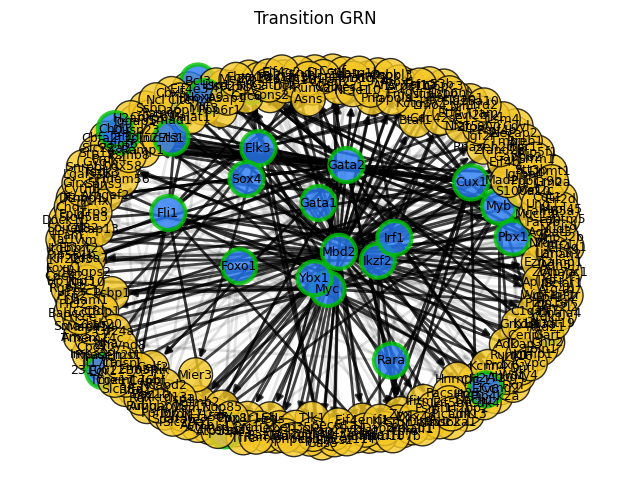

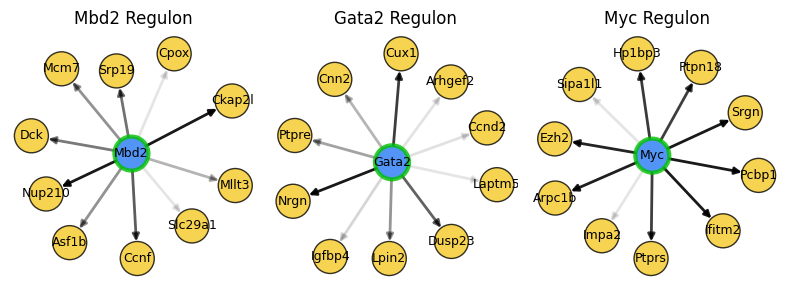

In [16]:
from switchtfi.utils import align_anndata_grn
from switchtfi import (
        calculate_weights,
        compute_corrected_pvalues,
        remove_insignificant_edges,
        rank_tfs,
        plot_grn,
        plot_regulon,
)

# Align scRNA-swq data and GRN to contain only genes present in both
erydata_aligned, ery_grn_aligned = align_anndata_grn(
        adata=erydata_proc,
        grn=ery_grn,
)

# Compute edge weights
ery_grn_weighted = calculate_weights(
        adata=erydata_aligned,
        grn=ery_grn_aligned,
        layer_key='X_magic_imputed',
        clustering_obs_key='prog_off',
)

# Compute empirical P-values for the edge weights
ery_grn_weighted_with_pvals = compute_corrected_pvalues(
        adata=erydata_aligned,
        grn=ery_grn_weighted,
        n_permutations=1000,
        clustering_obs_key='prog_off',
)

# Prune edges with P-value above threshold
transition_grn = remove_insignificant_edges(
        grn=ery_grn_weighted_with_pvals,
        alpha=0.05,
        inplace=False
)

# Rank TFS, NOTE: Now weighted out-degree is used
ranked_tfs = rank_tfs(
        grn=transition_grn,
        reverse=False,
        centrality_measure='out_degree',
        weight_key='score',
)

# Plot the transition GRN
fig, ax = plt.subplots()
plot_grn(
    grn=transition_grn,
    gene_centrality_df=ranked_tfs,
    plot_folder='./',
    ax=ax
)
ax.set_title('Transition GRN')

# Plot the top 3 regulons
tfs = ranked_tfs['gene'].tolist()
fig, axes = plt.subplots(1, 3, figsize=(8,3))
for i, ax in enumerate(axes):
  tf = tfs[i]
  plot_regulon(
      grn=transition_grn,
      tf=tf,
      top_k=10,
      sort_by='score',
      title=tf + ' Regulon',
      ax=ax
  )
fig.tight_layout()




